Ghazaleh Mahmoudi

400722156

Report : https://docs.google.com/document/d/1ICvMD6ooM33143_zRGilLj2FND5qhlpowHjX3OTwsFI/edit?usp=sharing

## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Training Samples**

In [2]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape

(18, 3)

In [3]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]])
Y.shape

(18, 1)

## **Plot Data in 3D**

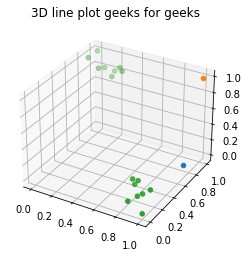

In [5]:
##### Plot Samples in 3D #####

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter3D(X[0, 0], X[0, 1], X[0, 2], 'pink')
ax.scatter3D(X[1, 0], X[1, 1], X[1, 2], 'blue')
ax.scatter3D(X[2:, 0], X[2:, 1], X[2:, 2], 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

## **LVQ1 Model Implementation From Scratch**

In [6]:
##### Implement your LVQ1 model here#####

class LVQ:

  def __init__(self, X, Y, epochs=10, alpha=0.03):
        
        self.epochs = epochs
        self.alpha = alpha
        self.prototypes = np.array([X[0], X[1]])

        self.training_vector = X
        self.training_label = Y

  def fit(self):
    
      for epoch in range(self.epochs):
        for i in np.arange(2, self.training_vector.shape[0]):
            distances = np.linalg.norm(self.prototypes - self.training_vector[i], axis=1)
            # distances = [dist(p, self.training_vector[i]) for p in self.prototypes]
        
            closest_prototype = np.argmin(distances)
            
            if self.training_label[i] != closest_prototype:
                self.prototypes[closest_prototype] = self.prototypes[closest_prototype] - self.alpha * (self.training_vector[i] - self.prototypes[closest_prototype])
            else:
                self.prototypes[closest_prototype] = self.prototypes[closest_prototype] + self.alpha * (self.training_vector[i] - self.prototypes[closest_prototype])

      return self

  def predict(self, X):
        distances = np.linalg.norm(self.prototypes - X, axis=1)
        closest_prototype = np.argmin(distances)
        return self.training_label[closest_prototype]


## **Train Model**

In [7]:
model = LVQ(X, Y, 10, 0.03)

model.fit()

## **Plot Data in 3D**

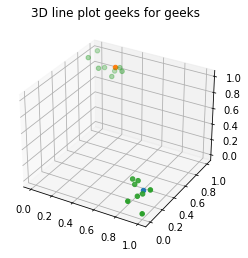

In [8]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter3D(model.prototypes[0, 0], model.prototypes[0, 1], model.prototypes[0, 2], 'red')
ax.scatter3D(model.prototypes[1, 0], model.prototypes[1, 1], model.prototypes[1, 2], 'blue')
ax.scatter3D(model.training_vector[2:, 0], model.training_vector[2:, 1], model.training_vector[2:, 2], 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

## **Test Model**

In [10]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.19, 0.93, 0.88]])
print(f'predicted class for input {test_sample} is class {model.predict(test_sample)[0]}.')

predicted class for input [[0.19 0.93 0.88]] is class 1.
